# Scatterplots

- Pyplot can retrieve the current figure with the function `gcf` and get the current axes with the function `gca`  
- Pyplot just mirrors the API of the axes objects (we can call the `plot` function against the pyplot module, but this is calling the axes plot functions underneath)  
- The function declaration from most of the functions in matplotlib end with an open set of keyword arguments. There are a lot of different properties we can control through these keyword arguments

`scatter` function takes an x-axis value as a 1st argument and y-axis value as the second. If the two arguments are the same, we get diagonal alignment of points

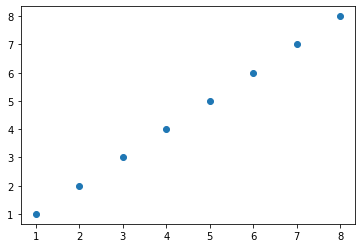

In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

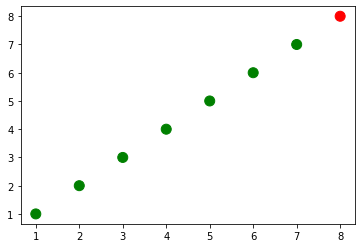

In [2]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

The separation of data points into lists, which describe them as components, is a pretty common pattern in matplotlib. We have some set of items, but they are described as the same slice across many different data sources (not as data point instances which encapsulate all properties)

In [3]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)
[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


Current axes object's children:
[<matplotlib.collections.PathCollection object at 0x7ff5495be9d0>, <matplotlib.collections.PathCollection object at 0x7ff5495bee80>, <matplotlib.spines.Spine object at 0x7ff5496092e0>, <matplotlib.spines.Spine object at 0x7ff549609400>, <matplotlib.spines.Spine object at 0x7ff549609520>, <matplotlib.spines.Spine object at 0x7ff549609640>, <matplotlib.axis.XAxis object at 0x7ff549609280>, <matplotlib.axis.YAxis object at 0x7ff549609b20>, Text(0.5, 1.0, 'Relationship between ball kicking and grades'), Text(0.0, 1.0, ''), Text(1.0, 1.0, ''), <matplotlib.legend.Legend object at 0x7ff549629460>, <matplotlib.patches.Rectangle object at 0x7ff5496293d0>]

Navigate through the Legend's child artists:
[<matplotlib.offsetbox.HPacker object at 0x7ff5495cfdf0>, <matplotlib.offsetbox.HPacker object at 0x7ff5495cfe20>]

Legend
            Text(0, 0, '')
                        Text(0, 0, 'Tall students')
                        Text(0, 0, 'Short students')
    FancyBbo

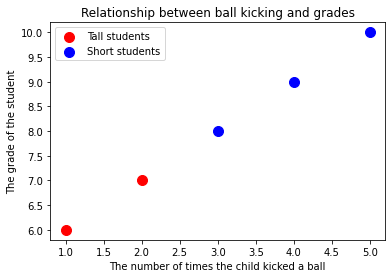

In [4]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')
# add a legend (uses the labels from plt.scatter)
plt.legend()
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
# plt.legend(loc=4, frameon=False, title='Legend')

# =========================================================

# the legend itself is an Artist and can contain children
# get children from current axes (the legend is the second to last item in this list)
print(f"Current axes object's children:\n{plt.gca().get_children()}\n")

# get the legend from the current axes
legend = plt.gca().get_children()[-2]
# you can use get_children to navigate through the child artists
print(f"Navigate through the Legend's child artists:")
print(f"{legend.get_children()[0].get_children()[1].get_children()[0].get_children()}\n")

# import the artist class from matplotlib
from matplotlib.artist import Artist
def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())
